In [1]:
import pandas as pd

In [2]:
import statsmodels.api as sm

In [4]:
df = pd.read_csv('delivery_time.csv')

In [5]:
df.head()

,distance_km,delivery_time_min
0,19.35,45.62
1,47.59,98.69
2,36.87,79.01
3,30.33,60.82
4,8.64,32.34


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   distance_km        120 non-null    float64
 1   delivery_time_min  120 non-null    float64
dtypes: float64(2)
memory usage: 2.0 KB


In [7]:
df.shape

(120, 2)

In [8]:
df.describe ()

,distance_km,delivery_time_min
count,120.000000,120.000000
mean,24.379000,59.256500
std,14.593584,26.509679
min,1.270000,14.320000
25%,10.705000,39.565000
50%,24.670000,56.595000
75%,38.085000,82.787500
max,49.360000,113.630000


In [9]:
import matplotlib.pyplot as plt

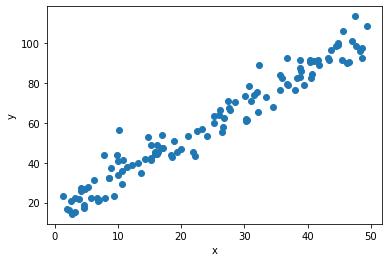

In [10]:
plt.scatter(df["distance_km"],df["delivery_time_min"])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [11]:
df_simple=df[["distance_km","delivery_time_min"]]

In [12]:
x= df_simple["distance_km"]
y= df_simple["delivery_time_min"]

In [13]:
x=sm.add_constant(x)

In [14]:
model=sm.OLS(y,x).fit()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      delivery_time_min   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     2268.
Date:                Thu, 08 Jan 2026   Prob (F-statistic):           6.82e-79
Time:                        09:52:13   Log-Likelihood:                -382.67
No. Observations:                 120   AIC:                             769.3
Df Residuals:                     118   BIC:                             774.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          16.0802      1.055     15.235      0.000      13.990      18.170
distance_km     1.7710      0.037     47.624      0.000       1.697       1.845
==============================================================================
Omnibus:                       11.887   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.308
Skew:                           0.632   Prob(JB):                      0.00129
Kurtosis:                       4.031   Cond. No.                         55.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
df_simple['y_pred']=model.predict(x)   

In [24]:
df_simple

,distance_km,delivery_time_min,y_perd,res,y_pred
0,19.35,45.62,50.349925,-4.729925,50.349925
1,47.59,98.69,100.364178,-1.674178,100.364178
2,36.87,79.01,81.378597,-2.368597,81.378597
3,30.33,60.82,69.795977,-8.975977,69.795977
4,8.64,32.34,31.382055,0.957945,31.382055
...,...,...,...,...,...
115,43.70,96.75,93.474821,3.275179,93.474821
116,40.38,90.77,87.594958,3.175042,87.594958
117,10.14,56.37,34.038620,22.331380,34.038620
118,44.74,98.95,95.316705,3.633295,95.316705


In [23]:
df_simple['res']=df_simple['delivery_time_min']-df_simple['y_pred']

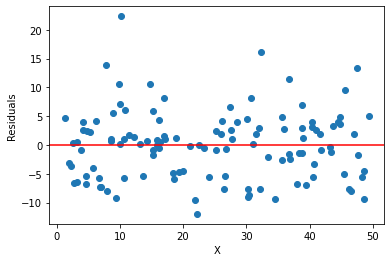

In [22]:
residuals=df_simple['res']
x=df_simple['distance_km']
plt.scatter(x,residuals)
plt.axhline(0,color='red')
plt.xlabel("X")
plt.ylabel("Residuals")
plt.show()